In [1]:
from sklearn import datasets
#데이터 로드
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [2]:
import pandas as pd
#데이터 확인
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df["label"] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,label
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


(442, 10) (442,) (442, 10) (442,)
Iteration 1000 : Loss 5381.1862
Iteration 2000 : Loss 4878.8738
Iteration 3000 : Loss 4505.2631
Iteration 4000 : Loss 4223.6900
Iteration 5000 : Loss 4008.3535
Iteration 6000 : Loss 3841.0531
Iteration 7000 : Loss 3708.9097
Iteration 8000 : Loss 3602.7755
Iteration 9000 : Loss 3516.1212
Iteration 10000 : Loss 3444.2598
Iteration 11000 : Loss 3383.8024
Iteration 12000 : Loss 3332.2779
Iteration 13000 : Loss 3287.8664
Iteration 14000 : Loss 3249.2115
Iteration 15000 : Loss 3215.2896
Iteration 16000 : Loss 3185.3165
Iteration 17000 : Loss 3158.6824
Iteration 18000 : Loss 3134.9053
Iteration 19000 : Loss 3113.5979
Iteration 20000 : Loss 3094.4445
Iteration 21000 : Loss 3077.1834
Iteration 22000 : Loss 3061.5948
Iteration 23000 : Loss 3047.4922
Iteration 24000 : Loss 3034.7150
Iteration 25000 : Loss 3023.1240
Iteration 26000 : Loss 3012.5977
Iteration 27000 : Loss 3003.0291
Iteration 28000 : Loss 2994.3235
Iteration 29000 : Loss 2986.3968
Iteration 30000 : 

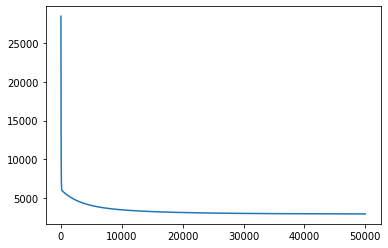

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#모델의 입력/예측 데이터 준비 후, 훈련/테스트셋으로 분리
df_X = diabetes.data
df_y = diabetes.target

X = np.delete(df_X,[],1) #df_X의 특정 feature 삭제할 경우 []부분에 column값 입력
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df_X.shape, df_y.shape, X.shape, y.shape) #삭제한 X의 배열 확인


#모델 구현 및 학습: linear model + MSE + Gradient descent
W = np.random.rand(np.size(X,1))
b = np.random.rand()
LEARNING_RATE = 0.01

def model(X, W, b):
    predictions = 0
    for i in range(np.size(X,1)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db


losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

2922.9409231345517


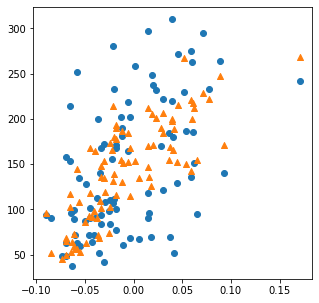

In [8]:
#테스트셋 검증
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

plt.figure(figsize=(5, 5))

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction, marker='^')
plt.show()

(442, 10) (442,) (442, 4) (442,)
Iteration 10000 : Loss 3538.0817
Iteration 20000 : Loss 3138.6667
Iteration 30000 : Loss 3071.6813
Iteration 40000 : Loss 3058.0359
Iteration 50000 : Loss 3053.8801


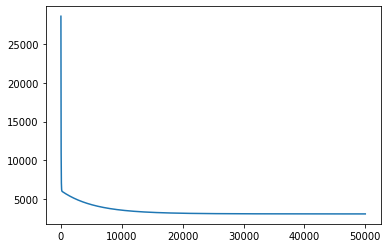

In [5]:
#df_X의 bmi, bp, s3, s5, feature만 학습

X = np.delete(df_X,[0,1,4,5,7,9],1)
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df_X.shape, df_y.shape, X.shape, y.shape)


W = np.random.rand(np.size(X,1))
b = np.random.rand()
LEARNING_RATE = 0.01


losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

2922.9409231345517


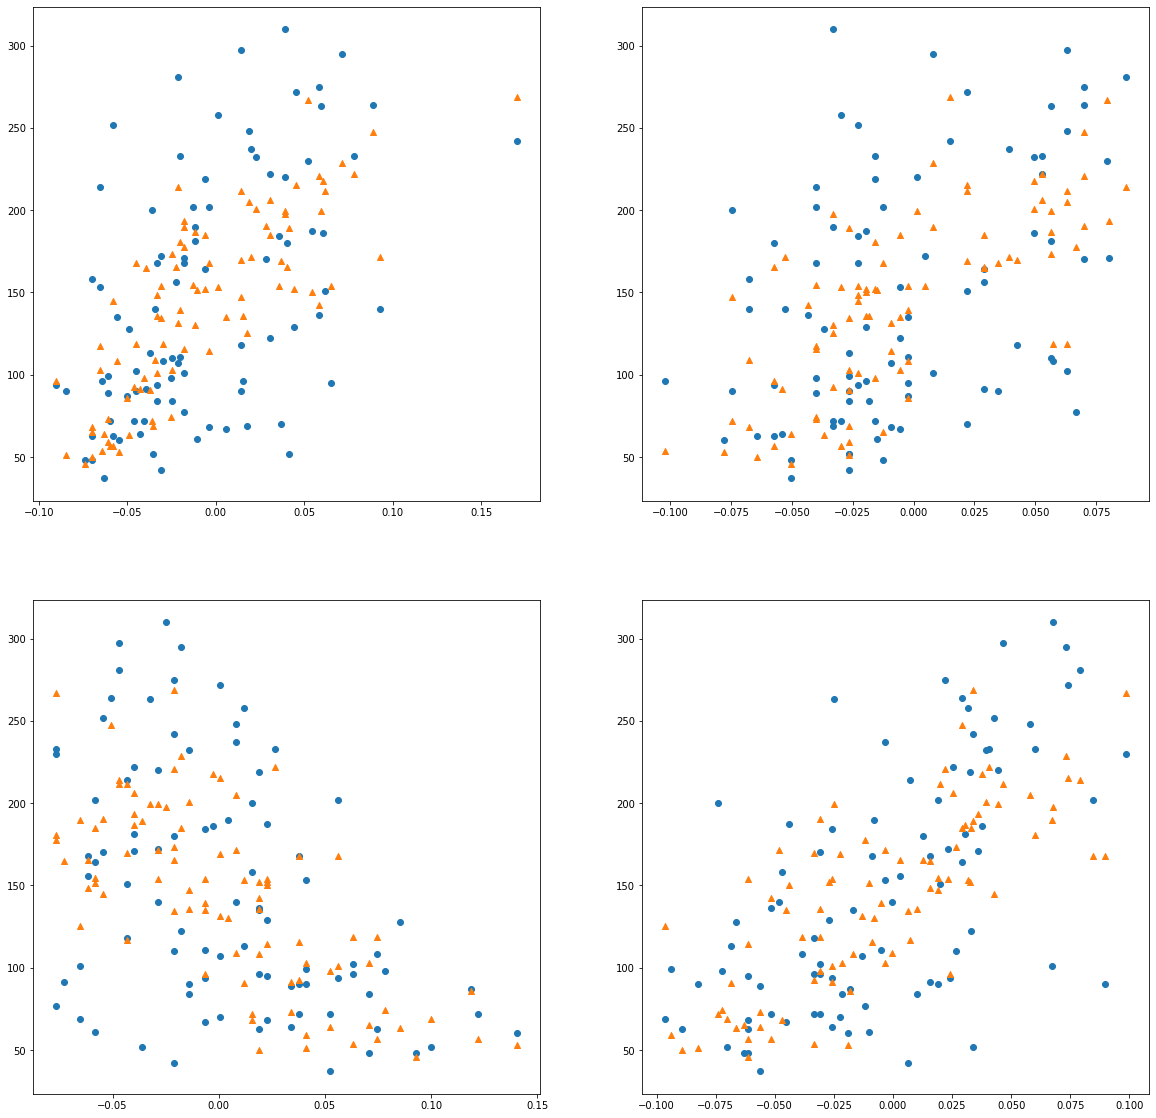

In [13]:
#테스트 결과 및 각 특성별 분포
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
print(mse)

plt.figure(figsize=(20, 20))
for col in range(0, np.size(X,1)):
    plt.subplot(2, 2, col+1)
    plt.scatter(X_test[:, col], y_test)
    plt.scatter(X_test[:, col], prediction, marker='^')

plt.show()